Preprocessing the original dataset to make it fit for usage, a 20015 point dataset pkl file is constructed for text-only models, whereas a 7272 datapoints file is constructed for image-text models.

In [ ]:
import pandas as pd
from pathlib import Path
import numpy as np 
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.utils import plot_model,np_utils
from keras import backend as K
import seaborn as sns


In [ ]:
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt
from matplotlib import style


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving all_data.csv to all_data.csv


Loading original dataset 'all_data.csv' available at
https://drive.google.com/open?id=0B3e3qZpPtccsMFo5bk9Ib3VCc2c

In [ ]:
data = pd.read_csv("all_data.csv")

In [ ]:
data.head()

,author,comments,country,crawled,domain_rank,id,language,likes,main_img_url,ord_in_thread,participants_count,published,replies_count,shares,site_url,spam_score,text,thread_title,title,type,uuid,caps_title,caps_thread,caps_text,title_len,thread_len,text_len,excl_title,excl_thread,excl_text,first_title,first_thread,first_text,second_title,second_thread,second_text,third_title,third_thread,third_text,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive,first_all,second_all,third_all
0,JEREMY W. PETERS,0.0,US,2017-03-14 08:25:04,0,3.0,english,0.0,https://static01.nyt.com/images/2016/11/23/us/...,0.0,0.0,2016-11-23 00:45:32,0.0,0.0,https://www.nytimes.com/2016/11/22/us/politics...,0.0,"They stood in line at Trump Tower, sometimes u...",0,"At Donald Trump<U+2019>s Properties, a Showcas...",real,f182f05dc3191ba4cb741e22f75fb43b,0,0,0,74,1,6489,0,0,0,2,0,407,0,0,150,0,0,45,9,21,5,6,20,5,14,30,14,52,409,150,45
1,STEVE EDER,0.0,US,2017-03-14 08:25:36,0,4.0,english,0.0,https://static01.nyt.com/images/2016/10/18/us/...,0.0,0.0,2016-10-17 18:46:52,0.0,0.0,https://www.nytimes.com/2016/10/18/us/politics...,0.0,Donald J. Trump <U+2019>s foundation informed ...,0,Trump Foundation Tells New York It Has Stopped...,real,220b87845a5eb01509b66c8008bf3728,0,0,0,75,1,2163,0,0,0,5,0,140,0,0,38,2,0,26,6,7,2,4,4,4,5,9,8,15,145,38,28
2,MAGGIE HABERMAN ASHLEY PARKER,0.0,US,2017-03-14 08:25:36,0,5.0,english,0.0,https://static01.nyt.com/images/2016/11/12/us/...,0.0,0.0,2016-11-12 02:08:39,0.0,0.0,https://www.nytimes.com/2016/11/12/us/politics...,0.0,President-elect Donald J. Trump won the White ...,0,"Donald Trump Prepares for White House Move, bu...",real,247e97e1da2dc67fcb31e20b84b2d960,0,0,1,74,1,6239,0,0,1,4,0,436,1,0,167,1,0,67,5,19,6,8,15,8,6,26,15,34,440,168,68
3,NELSON D. SCHWARTZ SUI-LEE WEE,0.0,US,2017-03-14 08:25:36,0,6.0,english,0.0,https://static01.nyt.com/images/2016/10/21/bus...,0.0,0.0,2016-10-20 22:09:04,0.0,0.0,https://www.nytimes.com/2016/10/21/business/in...,0.0,An investment pitch for a new Texas hotel is t...,0,Luring Chinese Investors With Trump<U+2019>s N...,real,e1f572512a36071cbca6056a31577389,0,0,13,59,1,7894,0,0,0,6,0,586,0,0,136,2,0,69,11,14,6,10,10,10,6,32,24,43,592,136,71
4,MAGGIE HABERMAN,0.0,US,2017-03-14 08:25:37,0,7.0,english,0.0,https://static01.nyt.com/images/2016/11/21/us/...,0.0,0.0,2016-11-21 01:42:23,0.0,0.0,https://www.nytimes.com/2016/11/21/us/politics...,0.0,President-elect Donald J. Trump <U+2019>s wife...,0,Melania and Barron Trump Won<U+2019>t Immediat...,real,584700e476e0d3c20731cb3d28e6ce2b,0,0,0,62,1,2979,0,0,0,7,0,216,0,0,82,1,0,27,1,12,0,3,6,2,4,14,4,25,223,82,28


In [ ]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'author', 'comments', 'country',
       'crawled', 'domain_rank', 'id', 'language', 'likes', 'main_img_url',
       'ord_in_thread', 'participants_count', 'published', 'replies_count',
       'shares', 'site_url', 'spam_score', 'text', 'thread_title', 'title',
       'type', 'uuid', 'caps_title', 'caps_thread', 'caps_text', 'title_len',
       'thread_len', 'text_len', 'excl_title', 'excl_thread', 'excl_text',
       'first_title', 'first_thread', 'first_text', 'second_title',
       'second_thread', 'second_text', 'third_title', 'third_thread',
       'third_text', 'anger', 'anticipation', 'disgust', 'fear', 'joy',
       'sadness', 'surprise', 'trust', 'negative', 'positive', 'first_all',
       'second_all', 'third_all'],
      dtype='object')

In [ ]:
print(len(data))

20015


## Dataset is balanced

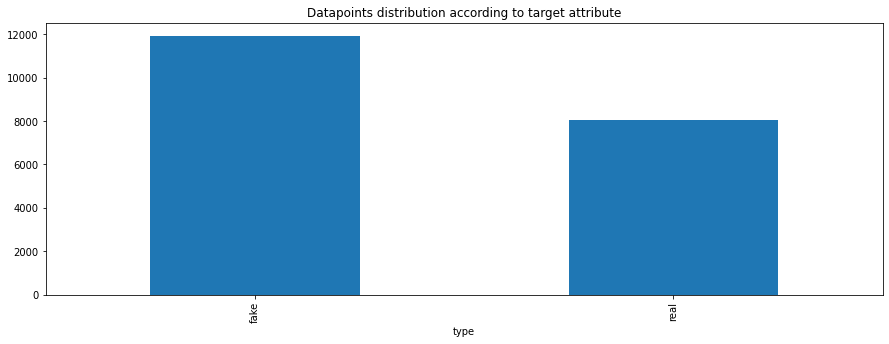

In [ ]:
_, ax = plt.subplots(1,1, figsize=(15,5))
data.groupby("type").count()['title'].plot.bar(title = "Datapoints distribution according to target attribute", ax = ax)

In [ ]:
data.drop(columns=["Unnamed: 0", "Unnamed: 0.1"], inplace=True)
data.columns

Index(['author', 'comments', 'country', 'crawled', 'domain_rank', 'id',
       'language', 'likes', 'main_img_url', 'ord_in_thread',
       'participants_count', 'published', 'replies_count', 'shares',
       'site_url', 'spam_score', 'text', 'thread_title', 'title', 'type',
       'uuid', 'caps_title', 'caps_thread', 'caps_text', 'title_len',
       'thread_len', 'text_len', 'excl_title', 'excl_thread', 'excl_text',
       'first_title', 'first_thread', 'first_text', 'second_title',
       'second_thread', 'second_text', 'third_title', 'third_thread',
       'third_text', 'anger', 'anticipation', 'disgust', 'fear', 'joy',
       'sadness', 'surprise', 'trust', 'negative', 'positive', 'first_all',
       'second_all', 'third_all'],
      dtype='object')

In [ ]:
import seaborn as sns

### Box plots for each attribute for verifying exploratory data analysis as mentioned in the paper

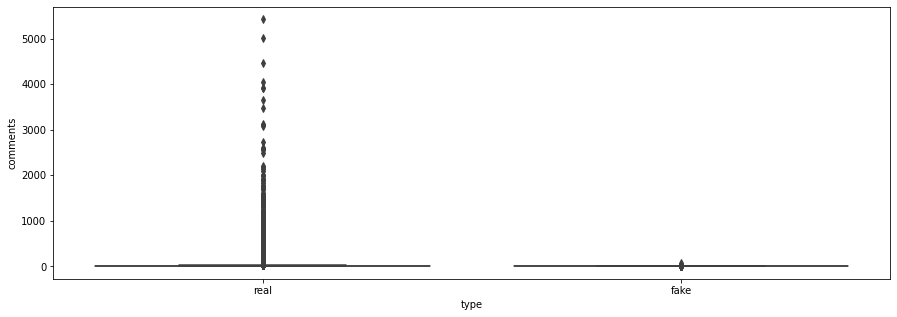

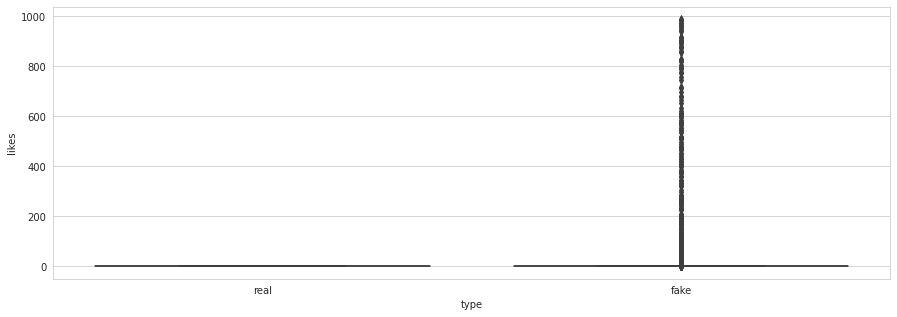

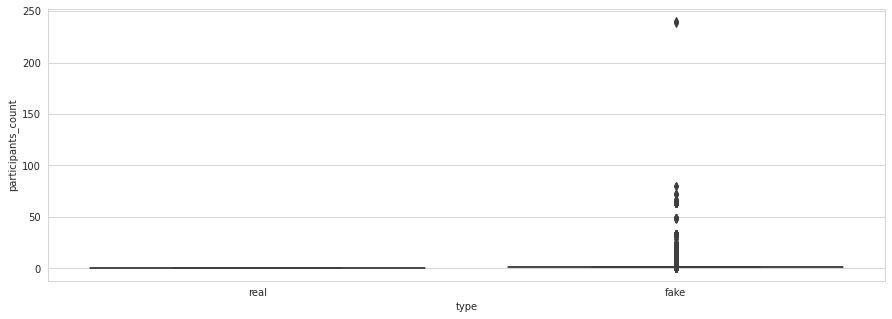

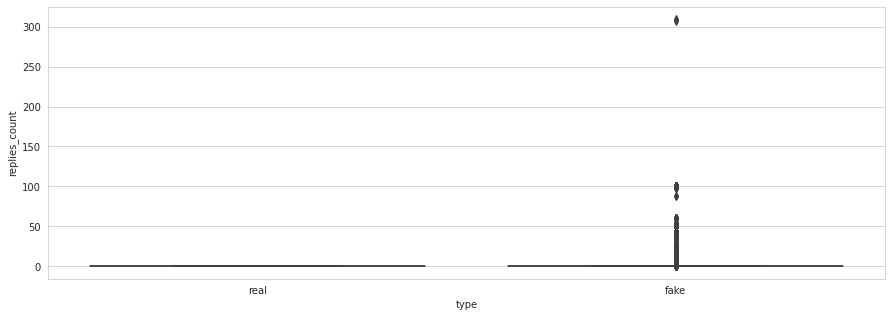

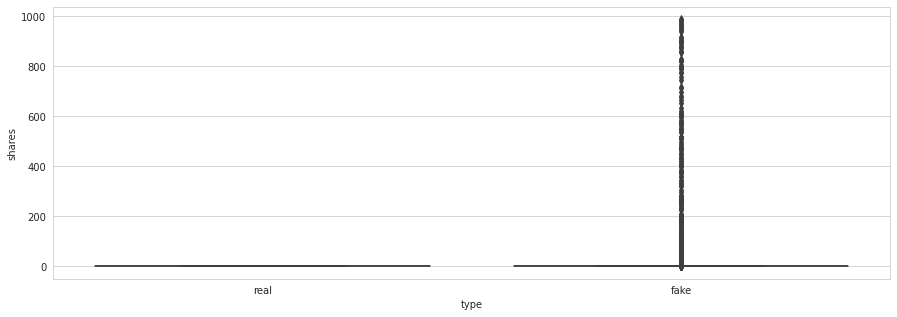

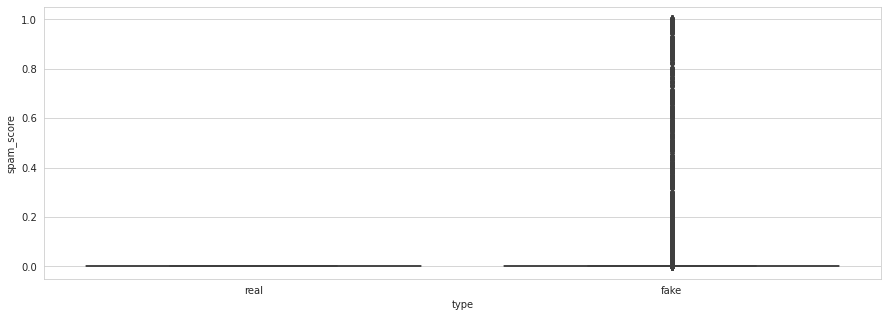

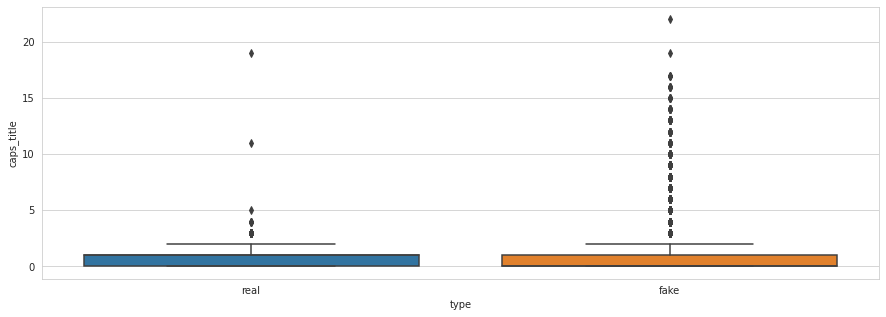

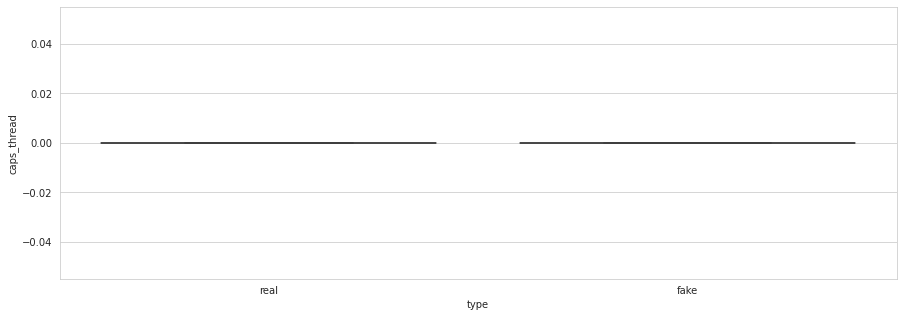

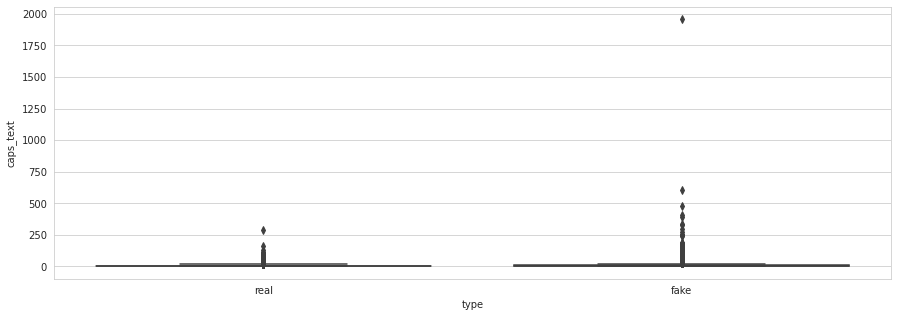

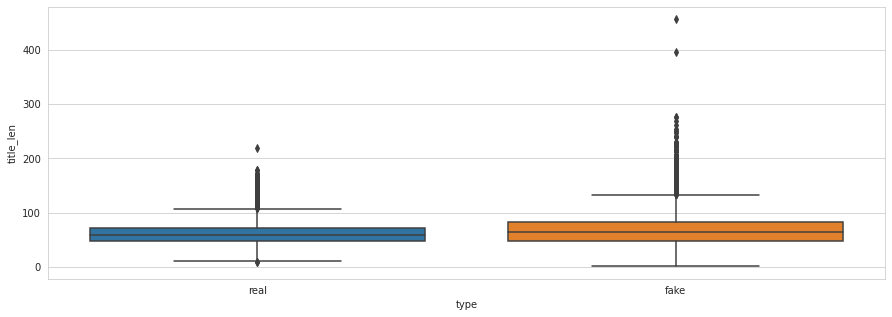

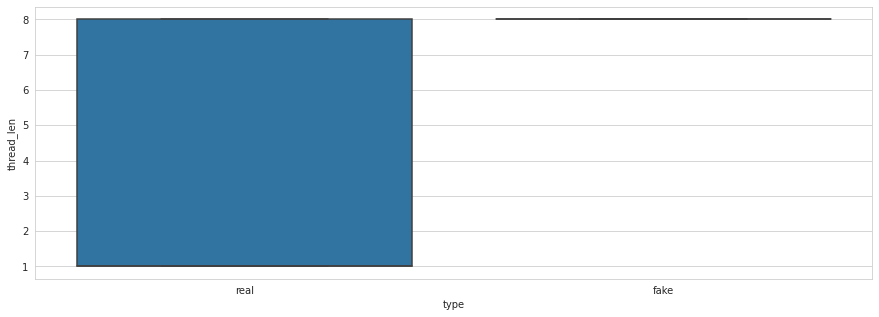

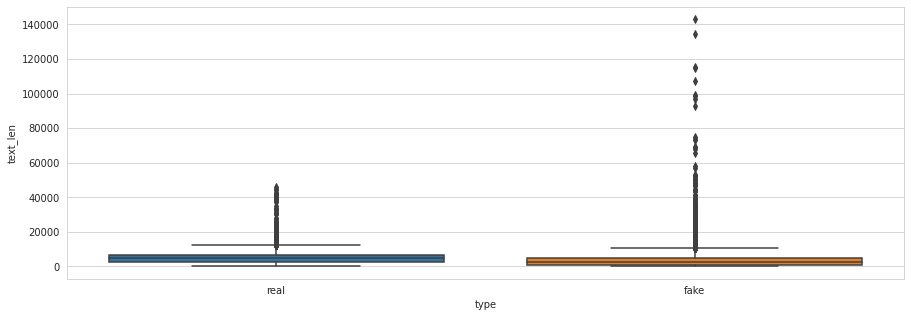

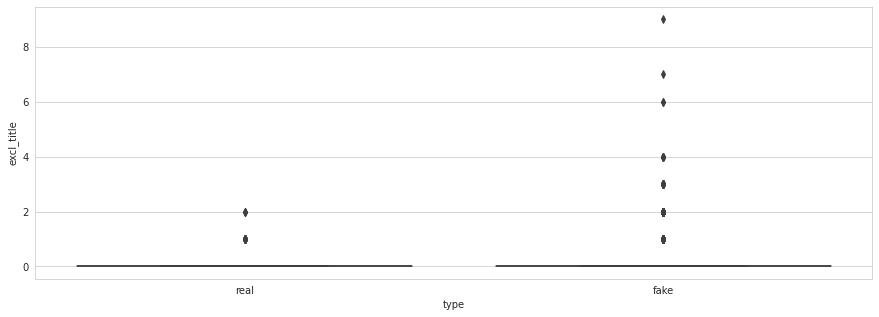

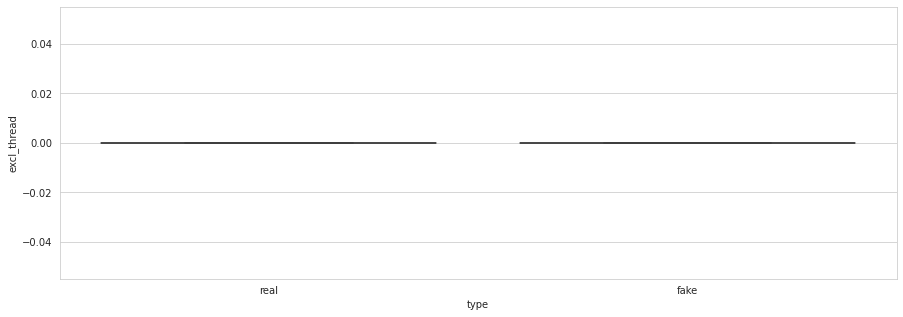

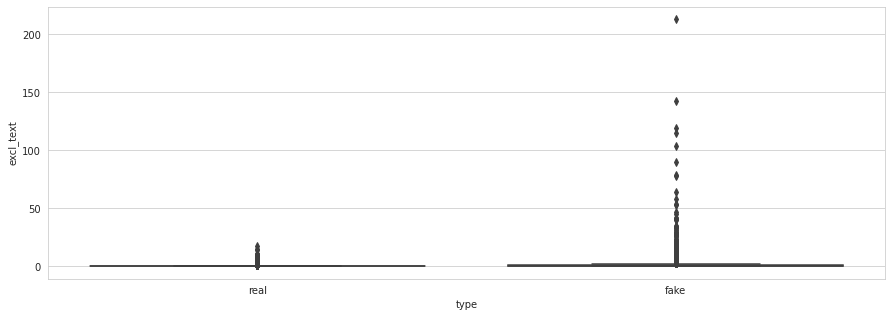

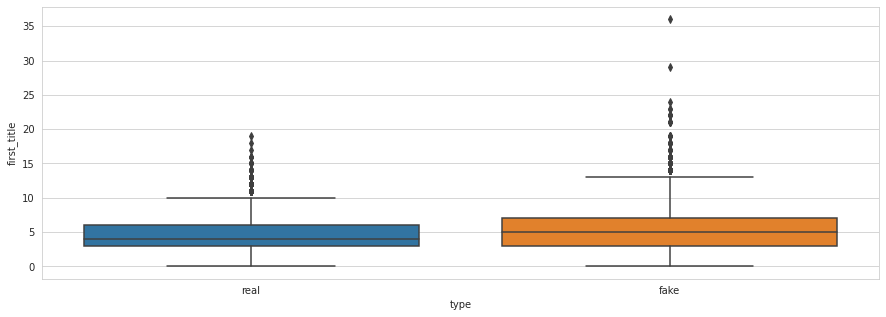

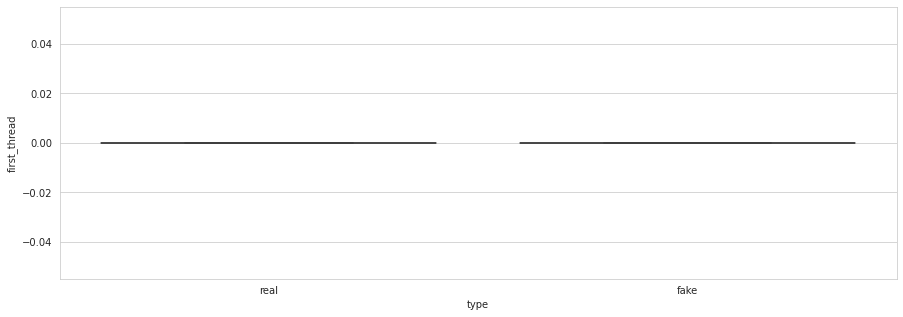

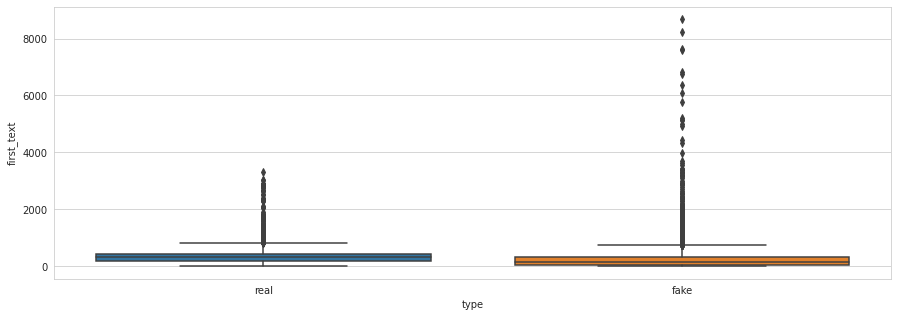

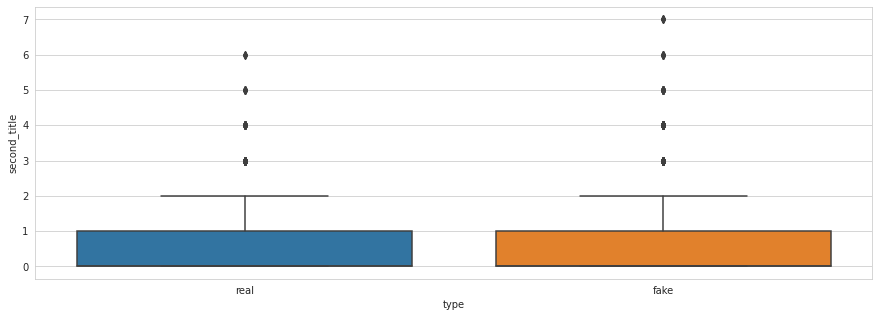

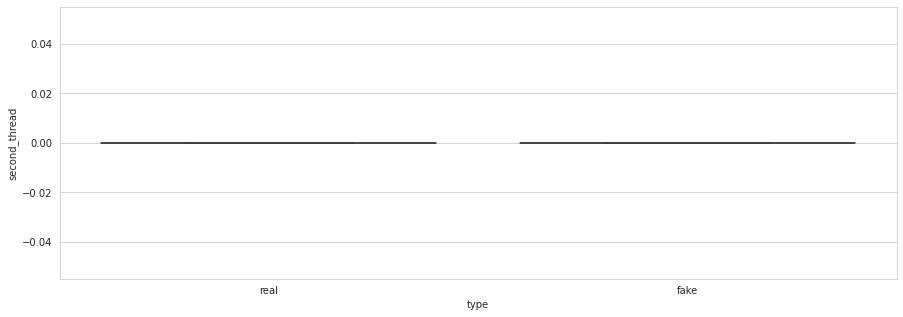

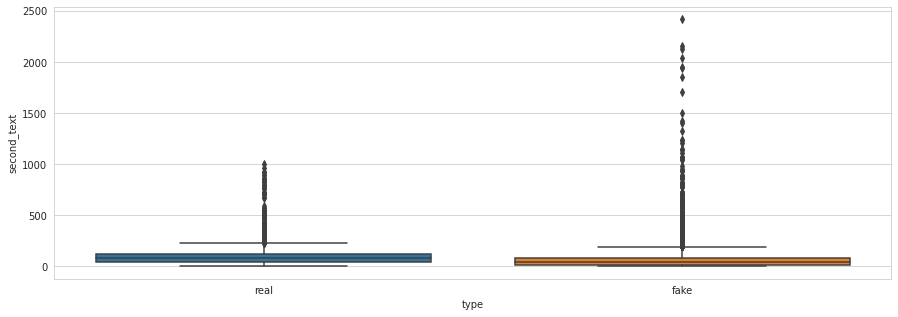

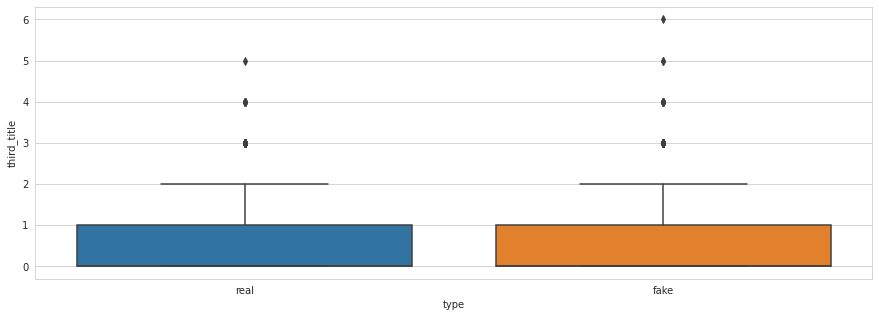

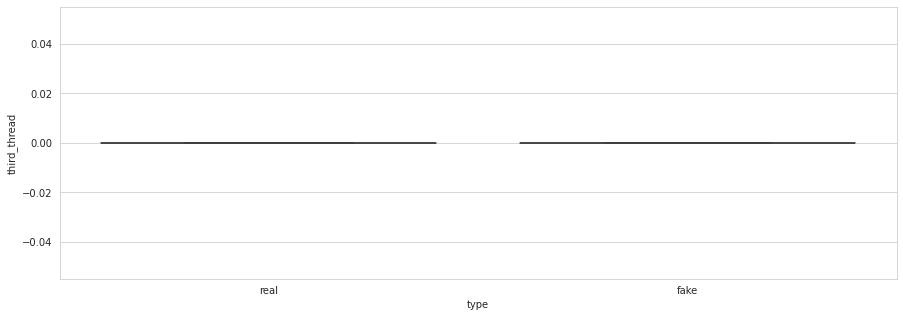

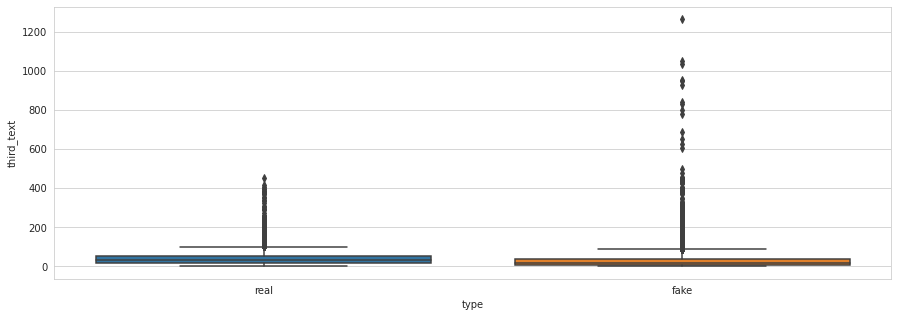

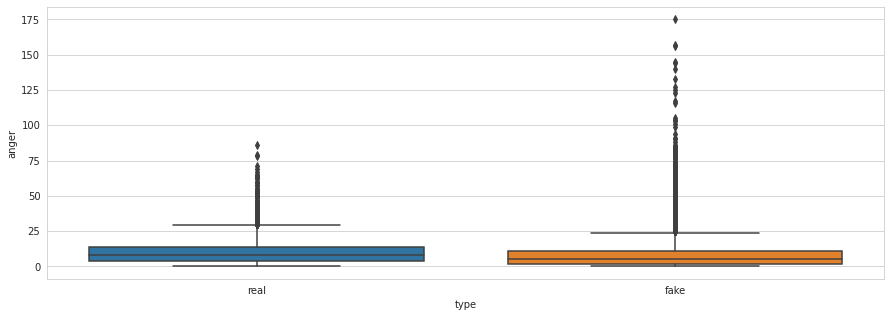

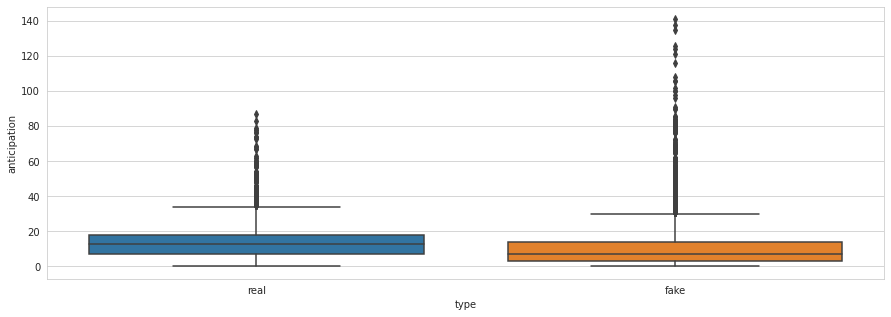

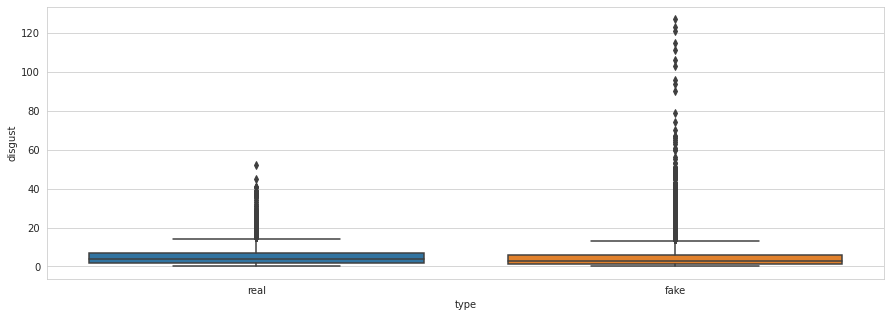

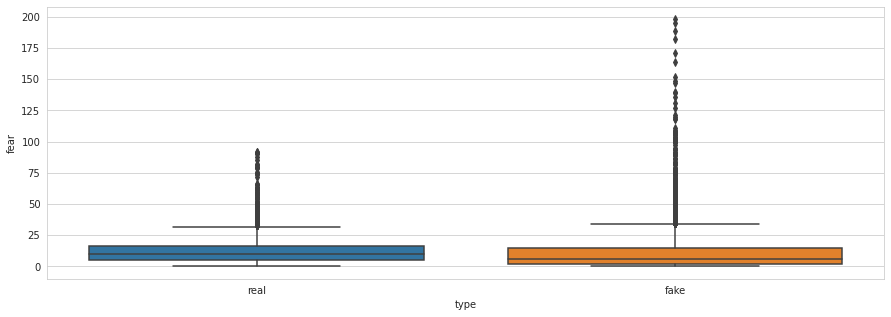

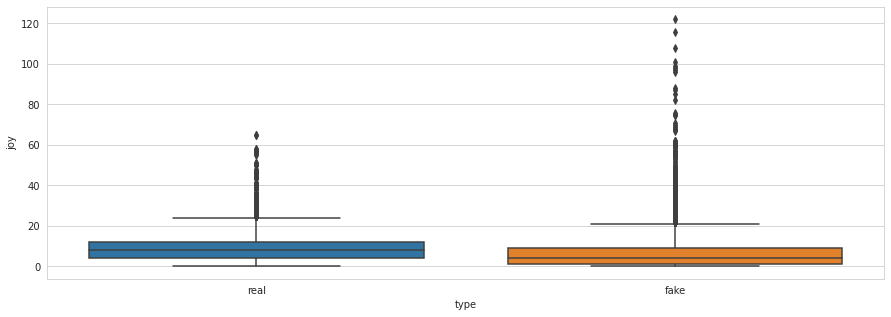

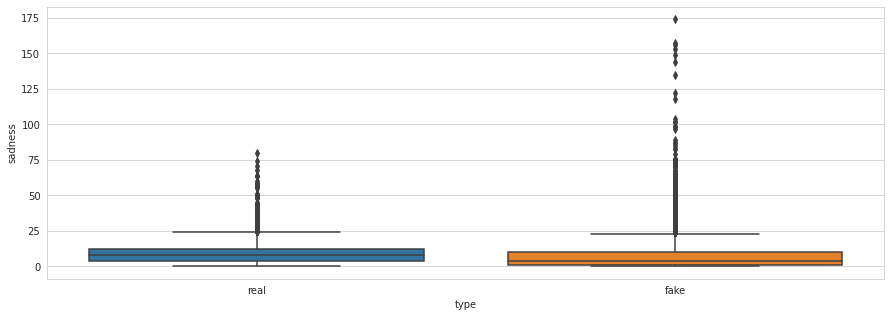

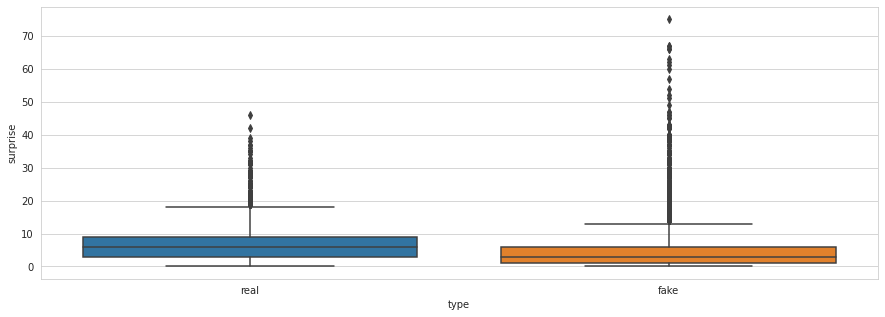

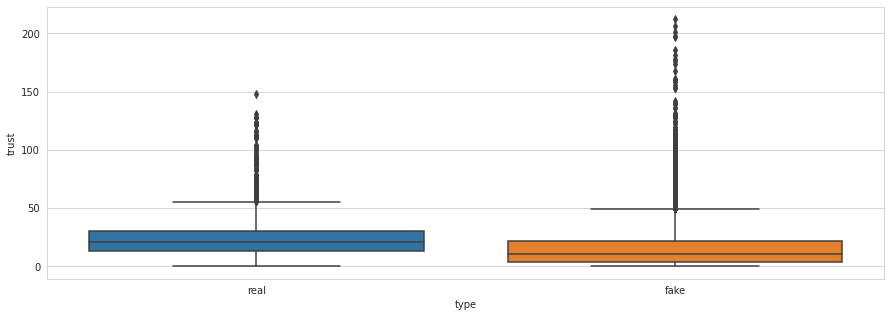

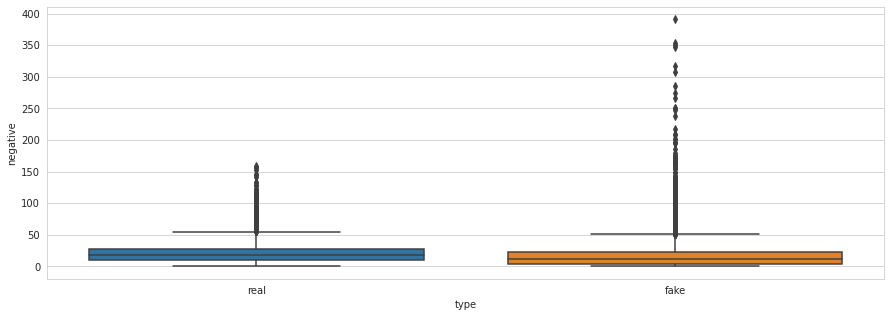

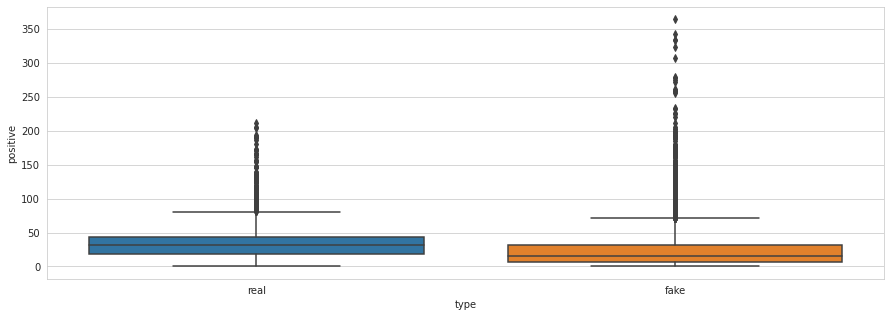

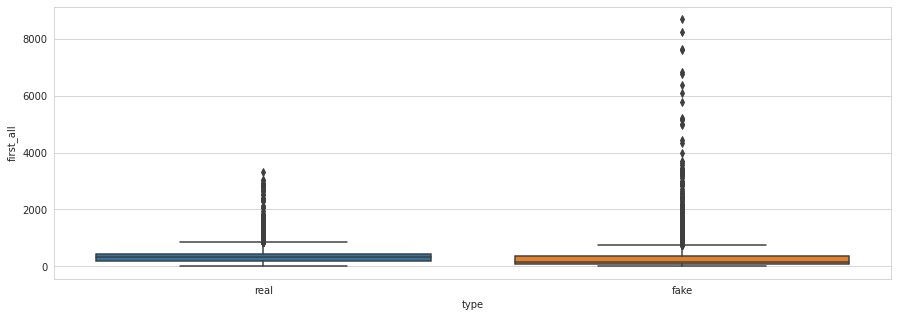

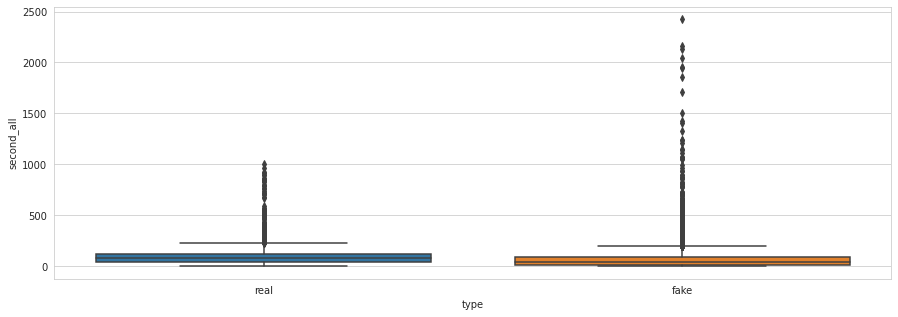

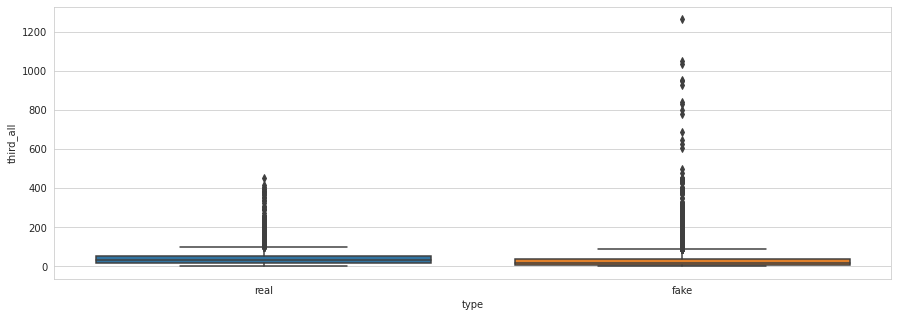

In [ ]:
for i in data.columns:
  if (i=='author' or i=='country' or i=='crawled' or i == 'domain_rank' or i == 'language' or i == 'id' or i== 'main_img_url' or i== 'published' or i=='ord_in_thread' or i=='site_url' or i=='text' or i=='thread_title' or i=='title' or i=='type' or i=='uuid'):
    continue
  _, ax = plt.subplots(1,1, figsize=(15,5))
  sns.set_style("whitegrid")
  sns_plot = sns.boxplot(x = 'type', y = i, data = data)
  sns_plot.figure.savefig("{}.png".format(i))

In [ ]:
data[data.columns[-31:]].describe()

,caps_title,caps_thread,caps_text,title_len,thread_len,text_len,excl_title,excl_thread,excl_text,first_title,first_thread,first_text,second_title,second_thread,second_text,third_title,third_thread,third_text,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive,first_all,second_all,third_all
count,20015.000000,20015.0,20015.000000,20015.000000,20015.000000,20015.000000,20015.000000,20015.0,20015.000000,20015.00000,20015.0,20015.000000,20015.000000,20015.0,20015.000000,20015.000000,20015.0,20015.000000,20015.000000,20015.000000,20015.000000,20015.000000,20015.000000,20015.000000,20015.000000,20015.000000,20015.000000,20015.000000,20015.000000,20015.000000,20015.000000
mean,0.589408,0.0,7.286885,63.429778,6.285236,4390.963727,0.036073,0.0,0.604896,4.71991,0.0,303.240869,0.592556,0.0,78.803647,0.452511,0.0,34.813040,9.157632,11.367325,5.121859,11.327404,7.476493,8.066450,5.463352,18.580015,19.000050,27.355234,307.960779,79.396203,35.265551
std,1.314944,0.0,20.328676,26.815483,3.010546,5116.220372,0.238659,0.0,3.201874,2.86092,0.0,353.424382,0.840963,0.0,96.589933,0.661985,0.0,45.043409,10.392424,10.417730,6.494133,12.650188,7.707065,9.203662,5.295207,16.878494,20.691637,25.558850,353.592102,96.712714,45.056939
min,0.000000,0.0,0.000000,1.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,1.000000,47.000000,8.000000,1523.000000,0.000000,0.0,0.000000,3.00000,0.0,100.000000,0.000000,0.0,24.000000,0.000000,0.0,10.000000,2.000000,4.000000,1.000000,3.000000,2.000000,2.000000,2.000000,7.000000,6.000000,10.000000,105.000000,24.000000,10.000000
50%,0.000000,0.0,3.000000,62.000000,8.000000,3310.000000,0.000000,0.0,0.000000,4.00000,0.0,226.000000,0.000000,0.0,58.000000,0.000000,0.0,24.000000,6.000000,9.000000,3.000000,8.000000,6.000000,6.000000,4.000000,15.000000,14.000000,22.000000,232.000000,58.000000,25.000000
75%,1.000000,0.0,8.000000,77.000000,8.000000,5806.000000,0.000000,0.0,0.000000,6.00000,0.0,402.000000,1.000000,0.0,105.000000,1.000000,0.0,46.000000,13.000000,16.000000,7.000000,15.000000,10.000000,11.000000,8.000000,26.000000,26.000000,38.000000,406.000000,106.000000,47.000000
max,22.000000,0.0,1957.000000,456.000000,8.000000,142961.000000,9.000000,0.0,213.000000,36.00000,0.0,8672.000000,7.000000,0.0,2421.000000,6.000000,0.0,1263.000000,175.000000,141.000000,127.000000,198.000000,122.000000,174.000000,75.000000,212.000000,391.000000,364.000000,8677.000000,2423.000000,1264.000000


### Dropping columns which don't provide any meaningful information

In [ ]:
df = data.drop(columns=['author','comments','country', 'crawled', 'domain_rank', 'id',
       'language', 'likes','ord_in_thread',
       'participants_count', 'published', 'replies_count', 'shares',
       'site_url', 'spam_score','uuid', 'thread_title'], inplace=False)
df.columns

Index(['main_img_url', 'text', 'title', 'type', 'caps_title', 'caps_thread',
       'caps_text', 'title_len', 'thread_len', 'text_len', 'excl_title',
       'excl_thread', 'excl_text', 'first_title', 'first_thread', 'first_text',
       'second_title', 'second_thread', 'second_text', 'third_title',
       'third_thread', 'third_text', 'anger', 'anticipation', 'disgust',
       'fear', 'joy', 'sadness', 'surprise', 'trust', 'negative', 'positive',
       'first_all', 'second_all', 'third_all'],
      dtype='object')

### removing articles with empty text or title

In [ ]:
# removing articles with empty text or title
df = df[df['title'].str.len() >= 1]
df = df[df['text'].str.len() >= 1]

In [ ]:
import nltk
from nltk.corpus import stopwords


In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip


--2021-04-04 17:19:08--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-04-04 17:19:08--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-04-04 17:19:09--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
stop_words = set(stopwords.words("english"))

In [ ]:
GLOVE_DIMS = 100
GLOVE_URL = Path("glove.6B.100d.txt")
MAX_LEN = 1000
MAX_LEN_TITLE = 93

Building GLOVE embedding matrix

In [ ]:
def load_glove(url):
    f = open(url.absolute())
    embeddings_index = dict()
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype="float32")
        embeddings_index[word] = coefs
    f.close()
    return embeddings_index

Encoding Labels

In [ ]:
def encode_labels(encoder, df_col):
    return encoder.fit_transform(df_col)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import plot_model,np_utils

labelencoder = LabelEncoder()
labelencoder.fit(df["type"])
target = labelencoder.transform(df["type"])
target = np_utils.to_categorical(target)
df["type"] = target



In [ ]:
df["type"].describe()
# REAL = 0; FAKE = 1;

count    20015.000000
mean         0.596603
std          0.490656
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: type, dtype: float64

In [ ]:
df.head()

,main_img_url,text,title,type,caps_title,caps_thread,caps_text,title_len,thread_len,text_len,excl_title,excl_thread,excl_text,first_title,first_thread,first_text,second_title,second_thread,second_text,third_title,third_thread,third_text,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive,first_all,second_all,third_all
0,https://static01.nyt.com/images/2016/11/23/us/...,"They stood in line at Trump Tower, sometimes u...","At Donald Trump<U+2019>s Properties, a Showcas...",0.0,0,0,0,74,1,6489,0,0,0,2,0,407,0,0,150,0,0,45,9,21,5,6,20,5,14,30,14,52,409,150,45
1,https://static01.nyt.com/images/2016/10/18/us/...,Donald J. Trump <U+2019>s foundation informed ...,Trump Foundation Tells New York It Has Stopped...,0.0,0,0,0,75,1,2163,0,0,0,5,0,140,0,0,38,2,0,26,6,7,2,4,4,4,5,9,8,15,145,38,28
2,https://static01.nyt.com/images/2016/11/12/us/...,President-elect Donald J. Trump won the White ...,"Donald Trump Prepares for White House Move, bu...",0.0,0,0,1,74,1,6239,0,0,1,4,0,436,1,0,167,1,0,67,5,19,6,8,15,8,6,26,15,34,440,168,68
3,https://static01.nyt.com/images/2016/10/21/bus...,An investment pitch for a new Texas hotel is t...,Luring Chinese Investors With Trump<U+2019>s N...,0.0,0,0,13,59,1,7894,0,0,0,6,0,586,0,0,136,2,0,69,11,14,6,10,10,10,6,32,24,43,592,136,71
4,https://static01.nyt.com/images/2016/11/21/us/...,President-elect Donald J. Trump <U+2019>s wife...,Melania and Barron Trump Won<U+2019>t Immediat...,0.0,0,0,0,62,1,2979,0,0,0,7,0,216,0,0,82,1,0,27,1,12,0,3,6,2,4,14,4,25,223,82,28


Converting title and text to indexes of glove dictionary and lowercasing the text

In [ ]:
glove = load_glove(GLOVE_URL)
t = Tokenizer()
t.fit_on_texts(glove.keys())
vocab_size = len(t.word_index) + 1
embedding_matrix = np.zeros((vocab_size, GLOVE_DIMS))
for word, i in t.word_index.items():
    embedding_vector = glove.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector



In [ ]:
df['title'] = t.texts_to_sequences(df.title.apply(lambda x: str(x).lower()))
# vectorized_justifications = t.texts_to_sequences(
#     total_df.justification.apply(lambda x: str(x).lower())
# )


In [ ]:
df['text'] = t.texts_to_sequences(data.text.apply(lambda x: str(x).lower()))

In [ ]:
df.head()

,main_img_url,text,title,type,caps_title,caps_thread,caps_text,title_len,thread_len,text_len,excl_title,excl_thread,excl_text,first_title,first_thread,first_text,second_title,second_thread,second_text,third_title,third_thread,third_text,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive,first_all,second_all,third_all
0,https://static01.nyt.com/images/2016/11/23/us/...,"[6101, 14028, 132, 271, 425, 18652, 2961, 1371...","[425, 14744, 18652, 71, 10303, 30, 14538, 18, ...",0.0,0,0,0,74,1,6489,0,0,0,2,0,407,0,0,150,0,0,45,9,21,5,6,20,5,14,30,14,52,409,150,45
1,https://static01.nyt.com/images/2016/10/18/us/...,"[14744, 216, 18652, 71, 10303, 30, 6257, 4603,...","[18652, 6257, 14327, 414, 1286, 1183, 6099, 13...",0.0,0,0,0,75,1,2163,0,0,0,5,0,140,0,0,38,2,0,26,6,7,2,4,4,4,5,9,8,15,145,38,28
2,https://static01.nyt.com/images/2016/11/12/us/...,"[997, 1132, 14744, 216, 18652, 2361, 201, 266,...","[14744, 18652, 17853, 142, 266, 582, 6138, 135...",0.0,0,0,1,74,1,6239,0,0,1,4,0,436,1,0,167,1,0,67,5,19,6,8,15,8,6,26,15,34,440,168,68
3,https://static01.nyt.com/images/2016/10/21/bus...,"[376, 13642, 1461, 142, 18, 414, 1300, 6226, 1...","[29208, 640, 13636, 13531, 18652, 71, 10303, 3...",0.0,0,0,13,59,1,7894,0,0,0,6,0,586,0,0,136,2,0,69,11,14,6,10,10,10,6,32,24,43,592,136,71
4,https://static01.nyt.com/images/2016/11/21/us/...,"[997, 1132, 14744, 216, 18652, 71, 10303, 30, ...","[54038, 189, 27100, 18652, 2361, 71, 10303, 13...",0.0,0,0,0,62,1,2979,0,0,0,7,0,216,0,0,82,1,0,27,1,12,0,3,6,2,4,14,4,25,223,82,28


Post padding the sequences

In [ ]:
df['text'] = pad_sequences(df.text, maxlen=MAX_LEN, padding='post', value=0).tolist()

In [ ]:

df['title'] = pad_sequences(df.title, maxlen=MAX_LEN_TITLE, padding='post', value=0).tolist()

In [ ]:
embedding_matrix.dump("embedding_matrix_glove100_ticnn.dat")

In [ ]:
df.head()

,main_img_url,text,title,type,caps_title,caps_thread,caps_text,title_len,thread_len,text_len,excl_title,excl_thread,excl_text,first_title,first_thread,first_text,second_title,second_thread,second_text,third_title,third_thread,third_text,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive,first_all,second_all,third_all
0,https://static01.nyt.com/images/2016/11/23/us/...,"[917, 201, 997, 1132, 13667, 637, 125, 3367, 1...","[425, 14744, 18652, 71, 10303, 30, 14538, 18, ...",0.0,0,0,0,74,1,6489,0,0,0,2,0,407,0,0,150,0,0,45,9,21,5,6,20,5,14,30,14,52,409,150,45
1,https://static01.nyt.com/images/2016/10/18/us/...,"[14744, 216, 18652, 71, 10303, 30, 6257, 4603,...","[18652, 6257, 14327, 414, 1286, 1183, 6099, 13...",0.0,0,0,0,75,1,2163,0,0,0,5,0,140,0,0,38,2,0,26,6,7,2,4,4,4,5,9,8,15,145,38,28
2,https://static01.nyt.com/images/2016/11/12/us/...,"[137, 26436, 13531, 201, 2403, 6098, 3367, 324...","[14744, 18652, 17853, 142, 266, 582, 6138, 135...",0.0,0,0,1,74,1,6239,0,0,1,4,0,436,1,0,167,1,0,67,5,19,6,8,15,8,6,26,15,34,440,168,68
3,https://static01.nyt.com/images/2016/10/21/bus...,"[1289, 137, 1610, 16006, 1301, 13949, 13533, 1...","[29208, 640, 13636, 13531, 18652, 71, 10303, 3...",0.0,0,0,13,59,1,7894,0,0,0,6,0,586,0,0,136,2,0,69,11,14,6,10,10,10,6,32,24,43,592,136,71
4,https://static01.nyt.com/images/2016/11/21/us/...,"[997, 1132, 14744, 216, 18652, 71, 10303, 30, ...","[54038, 189, 27100, 18652, 2361, 71, 10303, 13...",0.0,0,0,0,62,1,2979,0,0,0,7,0,216,0,0,82,1,0,27,1,12,0,3,6,2,4,14,4,25,223,82,28


In [ ]:
df = df.reset_index().drop("index", axis=1)

### Saving text only final dataframe for further use

In [ ]:
df.to_pickle("final_text_df.pkl")

In [ ]:
# visible = Input(shape=(MAX_LEN, 1))
# hidden = Embedding(vocab_size, GLOVE_DIMS, weights=[embedding_matrix], trainable=False)(
#     visible
# )
# code for embedding layer 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


NOTE:- adjust these commands based on data wanted to be retained for further use manually copy the graphs, plots whichever required, move to TICNN folder

In [ ]:
!cp -r /content/TICNN /content/gdrive/MyDrive/TICNN_Implementation

In [ ]:
df.head()

,main_img_url,text,title,type,caps_title,caps_thread,caps_text,title_len,thread_len,text_len,excl_title,excl_thread,excl_text,first_title,first_thread,first_text,second_title,second_thread,second_text,third_title,third_thread,third_text,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive,first_all,second_all,third_all
0,https://static01.nyt.com/images/2016/11/23/us/...,"[917, 201, 997, 1132, 13667, 637, 125, 3367, 1...","[425, 14744, 18652, 71, 10303, 30, 14538, 18, ...",0.0,0,0,0,74,1,6489,0,0,0,2,0,407,0,0,150,0,0,45,9,21,5,6,20,5,14,30,14,52,409,150,45
1,https://static01.nyt.com/images/2016/10/18/us/...,"[14744, 216, 18652, 71, 10303, 30, 6257, 4603,...","[18652, 6257, 14327, 414, 1286, 1183, 6099, 13...",0.0,0,0,0,75,1,2163,0,0,0,5,0,140,0,0,38,2,0,26,6,7,2,4,4,4,5,9,8,15,145,38,28
2,https://static01.nyt.com/images/2016/11/12/us/...,"[137, 26436, 13531, 201, 2403, 6098, 3367, 324...","[14744, 18652, 17853, 142, 266, 582, 6138, 135...",0.0,0,0,1,74,1,6239,0,0,1,4,0,436,1,0,167,1,0,67,5,19,6,8,15,8,6,26,15,34,440,168,68
3,https://static01.nyt.com/images/2016/10/21/bus...,"[1289, 137, 1610, 16006, 1301, 13949, 13533, 1...","[29208, 640, 13636, 13531, 18652, 71, 10303, 3...",0.0,0,0,13,59,1,7894,0,0,0,6,0,586,0,0,136,2,0,69,11,14,6,10,10,10,6,32,24,43,592,136,71
4,https://static01.nyt.com/images/2016/11/21/us/...,"[997, 1132, 14744, 216, 18652, 71, 10303, 30, ...","[54038, 189, 27100, 18652, 2361, 71, 10303, 13...",0.0,0,0,0,62,1,2979,0,0,0,7,0,216,0,0,82,1,0,27,1,12,0,3,6,2,4,14,4,25,223,82,28


In [ ]:
df['main_img_url'][8552]

'http://www.govtslaves.info/wp-content/uploads/2016/03/tef-poe.jpg'

In [ ]:
import requests
import PIL
from PIL import Image
import cv2

SRC :- Caffe Model https://github.com/vinuvish/Face-detection-with-OpenCV-and-deep-learning/blob/master/models/deploy.prototxt.txt

In [ ]:
# face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
# ADJUST THESE PATHS ACCORDINGLY

caffemodel = '/content/gdrive/MyDrive/TICNN_Implementation/caffe_model/res10_300x300_ssd_iter_140000.caffemodel'
deploy = '/content/gdrive/MyDrive/TICNN_Implementation/caffe_model/deploy.prototxt.txt'
model = cv2.dnn.readNetFromCaffe(deploy, caffemodel)

# small_df = df[:4]
df["face_count"] = np.nan
df["width"] = np.nan
df["height"] = np.nan
# df.head()
base = "/content/gdrive/MyDrive/TICNN_Implementation/images"
for index, row in df.iterrows():
    # folder  = row[0]
    # sub_folder = row[1]
    url = row['main_img_url']
    r = requests.get(url)

    if r.status_code == 200:
        address = "{0}/{1}.png".format(base, str(index))
        with open(address, "wb") as f:
            f.write(r.content)
        # img = PIL.Image.open(address)
        # small_df["width"][index], small_df["height"][index] = img.size 
        # img = cv2.imread(address)
        # faces1 = face_cascade.detectMultiScale(img, scaleFactor=1.2, minNeighbors=2, minSize=(20, 20))   
        # small_df["face_count"][index] = len(faces1)  
        image = cv2.imread(address)
        if (image is None):
          print("None error")
          continue
        (df["height"][index], df["width"][index]) = image.shape[:2]
        blob = cv2.dnn.blobFromImage(cv2.resize(image, (400, 400)), 1.2, (400, 400), (104.0, 177.0, 123.0))      

        model.setInput(blob)
        detections = model.forward()
        #Iterate over all of the faces detected and extract their start and end points
        count = 0
        for i in range(0, detections.shape[2]):
          if (detections[0, 0, i, 2] > 0.165):
            count = count + 1
        df["face_count"][index] = count
        print(index)





0
1
2
3
4
5
7
8
9
10
11
12
13
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
57
58
59
60
61
62
63
64
65
66
67
69
70
71
72
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
None error
112
113
114
115
116
117
118
119
121
122
123
124
125
126
127
128
129
130
131
133
134
135
136
137
138
140
141
142
143
144
145
146
147
148
149
150
152
153
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
180
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
208
209
210
211
212
213
214
215
216
218
219
220
221
222
223
224
225
226
227
229
230
231
232
233
234
235
236
238
240
241
242
243
244
245
246
247
248
249
250
251
252
253
255
256
257
258
259
260
262
263
264
265
267
268
269
271
272
274
275
276
277
278
279
None error
282
283
284
285
286
288
289
291
292
293
294
295
296
297
298


ConnectionError: ignored

In [ ]:
df['main_img_url'][3220]

'https://t4.rbxcdn.com/c5695e5f087535e2066dc473e03b1819'

In [ ]:
for index, row in df.iterrows():
    if index<= 3219: # There seems to be some problem in 3042 index
      continue 
    # folder  = row[0]
    # sub_folder = row[1]
    url = row['main_img_url']
    headers = {"User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.114 Safari/537.36"
}
    try:
      r = requests.get(url , headers=headers)
    except requests.exceptions.ConnectionError:
      print("Connection error")
      continue
    except:
      print("other error#########################")
      continue  

    if r.status_code == 200:
        address = "{0}/{1}.png".format(base, str(index))
        with open(address, "wb") as f:
            f.write(r.content)
        # img = PIL.Image.open(address)
        # small_df["width"][index], small_df["height"][index] = img.size 
        # img = cv2.imread(address)
        # faces1 = face_cascade.detectMultiScale(img, scaleFactor=1.2, minNeighbors=2, minSize=(20, 20))   
        # small_df["face_count"][index] = len(faces1)  
        image = cv2.imread(address)
        if (image is None):
          print("None error")
          continue
        (df["height"][index], df["width"][index]) = image.shape[:2]
        blob = cv2.dnn.blobFromImage(cv2.resize(image, (400, 400)), 1.2, (400, 400), (104.0, 177.0, 123.0))      

        model.setInput(blob)
        detections = model.forward()
        #Iterate over all of the faces detected and extract their start and end points
        count = 0
        for i in range(0, detections.shape[2]):
          if (detections[0, 0, i, 2] > 0.165):
            count = count + 1
        df["face_count"][index] = count
        print(index)


3221
3223
3224
3225
3226
3227
3229
3231
3232
3233
3234
3236
3238
3239
3240
3241
3242
3243
3244
3245
3246
3247
3250
3251
3252
3253
3254
3255
3256
3257
3258
3259
3262
3263
3264
3265
3267
3268
3271
3272
3273
3274
3276
3278
3280
3282
3283
3284
3285
3286
3287
3288
3289
3290
3291
3292
3294
3295
3296
3299
3301
3302
3303
3304
3305
3307
3309
3310
3311
3312
3314
3315
3317
3318
3319
3320
3321
3323
3324
3325
3326
3327
3328
3329
3330
3331
3332
3334
3336
3337
3339
3340
3341
3342
3344
3346
3347
3349
3350
3352
3353
3354
3355
3356
3357
3358
3360
Connection error
3362
3363
3364
3365
3366
3367
3369
3371
3372
Connection error
Connection error
3375
3376
3378
Connection error
3380
3381
3383
Connection error
3385
3387
Connection error
3389
3391
3392
3393
3394
3395
3396
3397
3398
3399
3400
3401
3402
3403
3404
3405
3407
3409
3410
3411
Connection error
3413
3414
3416
3417
3418
3419
3420
3421
3422
3423
3424
3425
3426
3428
3429
3430
3431
3432
3433
3434
3435
3436
3438
3439
3441
3442
3443
3445
3446
3447
3448
3449
3

In [ ]:
caffemodel = '/content/gdrive/MyDrive/TICNN_Implementation/caffe_model/res10_300x300_ssd_iter_140000.caffemodel'
deploy = '/content/gdrive/MyDrive/TICNN_Implementation/caffe_model/deploy.prototxt.txt'
model = cv2.dnn.readNetFromCaffe(deploy, caffemodel)
df = pd.read_pickle("/content/gdrive/MyDrive/TICNN_Implementation/TICNN/final_text_df.pkl") # RUNTIME DISONNECTED
df.head()



,main_img_url,text,title,type,caps_title,caps_thread,caps_text,title_len,thread_len,text_len,excl_title,excl_thread,excl_text,first_title,first_thread,first_text,second_title,second_thread,second_text,third_title,third_thread,third_text,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive,first_all,second_all,third_all
0,https://static01.nyt.com/images/2016/11/23/us/...,"[917, 201, 997, 1132, 13667, 637, 125, 3367, 1...","[425, 14744, 18652, 71, 10303, 30, 14538, 18, ...",0.0,0,0,0,74,1,6489,0,0,0,2,0,407,0,0,150,0,0,45,9,21,5,6,20,5,14,30,14,52,409,150,45
1,https://static01.nyt.com/images/2016/10/18/us/...,"[14744, 216, 18652, 71, 10303, 30, 6257, 4603,...","[18652, 6257, 14327, 414, 1286, 1183, 6099, 13...",0.0,0,0,0,75,1,2163,0,0,0,5,0,140,0,0,38,2,0,26,6,7,2,4,4,4,5,9,8,15,145,38,28
2,https://static01.nyt.com/images/2016/11/12/us/...,"[137, 26436, 13531, 201, 2403, 6098, 3367, 324...","[14744, 18652, 17853, 142, 266, 582, 6138, 135...",0.0,0,0,1,74,1,6239,0,0,1,4,0,436,1,0,167,1,0,67,5,19,6,8,15,8,6,26,15,34,440,168,68
3,https://static01.nyt.com/images/2016/10/21/bus...,"[1289, 137, 1610, 16006, 1301, 13949, 13533, 1...","[29208, 640, 13636, 13531, 18652, 71, 10303, 3...",0.0,0,0,13,59,1,7894,0,0,0,6,0,586,0,0,136,2,0,69,11,14,6,10,10,10,6,32,24,43,592,136,71
4,https://static01.nyt.com/images/2016/11/21/us/...,"[997, 1132, 14744, 216, 18652, 71, 10303, 30, ...","[54038, 189, 27100, 18652, 2361, 71, 10303, 13...",0.0,0,0,0,62,1,2979,0,0,0,7,0,216,0,0,82,1,0,27,1,12,0,3,6,2,4,14,4,25,223,82,28


In [ ]:
# small_df = df[:4]
df["face_count"] = np.nan
df["width"] = np.nan
df["height"] = np.nan
# df.head()
base = "/content/gdrive/MyDrive/TICNN_Implementation/images"
for index, row in df.iterrows():
    if index<= 8524: # There seems to be some problem in 8550 index and around 404 eror, bad gateway
      print(str(index) + "Already Done")
      continue 
    # folder  = row[0]
    # sub_folder = row[1]
    print("starting " + str(index))
    url = row['main_img_url']
    headers = {"User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.114 Safari/537.36"
}
    try:
      r = requests.get(url , headers=headers)
    except requests.exceptions.ConnectionError:
      print("Connection error")
      continue
    except:
      print("other error#########################")
      continue  
    if r.status_code == 404:
      print("rage not found")
      continue
      
    if r.status_code == 200:
        address = "{0}/{1}.png".format(base, str(index))
        with open(address, "wb") as f:
            f.write(r.content)
        # img = PIL.Image.open(address)
        # small_df["width"][index], small_df["height"][index] = img.size 
        # img = cv2.imread(address)
        # faces1 = face_cascade.detectMultiScale(img, scaleFactor=1.2, minNeighbors=2, minSize=(20, 20))   
        # small_df["face_count"][index] = len(faces1)  
        image = cv2.imread(address)
        if (image is None):
          print("None error")
          continue
        (df["height"][index], df["width"][index]) = image.shape[:2]
        blob = cv2.dnn.blobFromImage(cv2.resize(image, (400, 400)), 1.2, (400, 400), (104.0, 177.0, 123.0))      

        model.setInput(blob)
        detections = model.forward()
        #Iterate over all of the faces detected and extract their start and end points
        count = 0
        for i in range(0, detections.shape[2]):
          if (detections[0, 0, i, 2] > 0.165):
            count = count + 1
        df["face_count"][index] = count
        print("ended successfully" + str(index))


Streaming output truncated to the last 5000 lines.
starting 15619
ended successfully15619
starting 15620
ended successfully15620
starting 15621
ended successfully15621
starting 15622
ended successfully15622
starting 15623
ended successfully15623
starting 15624
ended successfully15624
starting 15625
ended successfully15625
starting 15626
ended successfully15626
starting 15627
ended successfully15627
starting 15628
ended successfully15628
starting 15629
ended successfully15629
starting 15630
ended successfully15630
starting 15631
ended successfully15631
starting 15632
ended successfully15632
starting 15633
ended successfully15633
starting 15634
ended successfully15634
starting 15635
ended successfully15635
starting 15636
ended successfully15636
starting 15637
ended successfully15637
starting 15638
ended successfully15638
starting 15639
ended successfully15639
starting 15640
ended successfully15640
starting 15641
ended successfully15641
starting 15642
ended successfully15642
starting 1564

In [ ]:
#refetching for index less than 8524, run your code accordingly depeding on where the scripts 
#breaks due to inactivity/ timeout on google collab ,BASIC code reamins the same

for index, row in df.iterrows():
    if index> 8524: # There seems to be some problem in 8550 index and around 404 eror, bad gateway
      break
    # folder  = row[0]
    # sub_folder = row[1]
    # print("starting " + str(index))
    # url = row['main_img_url']
    # headers = {"User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.114 Safari/537.36"
# }
    # try:
    #   r = requests.get(url , headers=headers)
    # except requests.exceptions.ConnectionError:
    #   print("Connection error")
    #   continue
    # except:
    #   print("other error#########################")
    #   continue  
    # if r.status_code == 404:
    #   print("rage not found")
    #   continue
      
    # if r.status_code == 200:
    address = "{0}/{1}.png".format(base, str(index))
    # with open(address, "wb") as f:
        # f.write(r.content)
    # img = PIL.Image.open(address)
    # small_df["width"][index], small_df["height"][index] = img.size 
    # img = cv2.imread(address)
    # faces1 = face_cascade.detectMultiScale(img, scaleFactor=1.2, minNeighbors=2, minSize=(20, 20))   
    # small_df["face_count"][index] = len(faces1)  
    image = cv2.imread(address)
    if (image is None):
      print("No image")
      continue
    (df["height"][index], df["width"][index]) = image.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(image, (400, 400)), 1.2, (400, 400), (104.0, 177.0, 123.0))      

    model.setInput(blob)
    detections = model.forward()
    #Iterate over all of the faces detected and extract their start and end points
    count = 0
    for i in range(0, detections.shape[2]):
      if (detections[0, 0, i, 2] > 0.165):
        count = count + 1
    df["face_count"][index] = count
    print("ended successfully" + str(index))

Streaming output truncated to the last 5000 lines.
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No image
No i

In [ ]:
while True:pass

KeyboardInterrupt: ignored

Keeping only rows where images was retrieved succesfully

In [ ]:
df['image_name'] = df.index
df = df[df['face_count'].notna()]

In [ ]:
 print(df.isnull().sum())

main_img_url     0
text             0
title            0
type             0
caps_title       0
caps_thread      0
caps_text        0
title_len        0
thread_len       0
text_len         0
excl_title       0
excl_thread      0
excl_text        0
first_title      0
first_thread     0
first_text       0
second_title     0
second_thread    0
second_text      0
third_title      0
third_thread     0
third_text       0
anger            0
anticipation     0
disgust          0
fear             0
joy              0
sadness          0
surprise         0
trust            0
negative         0
positive         0
first_all        0
second_all       0
third_all        0
face_count       0
width            0
height           0
image_name       0
dtype: int64


In [ ]:
df.head()

,main_img_url,text,title,type,caps_title,caps_thread,caps_text,title_len,thread_len,text_len,excl_title,excl_thread,excl_text,first_title,first_thread,first_text,second_title,second_thread,second_text,third_title,third_thread,third_text,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive,first_all,second_all,third_all,face_count,width,height,image_name
0,https://static01.nyt.com/images/2016/11/23/us/...,"[917, 201, 997, 1132, 13667, 637, 125, 3367, 1...","[425, 14744, 18652, 71, 10303, 30, 14538, 18, ...",0.0,0,0,0,74,1,6489,0,0,0,2,0,407,0,0,150,0,0,45,9,21,5,6,20,5,14,30,14,52,409,150,45,0.0,768.0,513.0,0
1,https://static01.nyt.com/images/2016/10/18/us/...,"[14744, 216, 18652, 71, 10303, 30, 6257, 4603,...","[18652, 6257, 14327, 414, 1286, 1183, 6099, 13...",0.0,0,0,0,75,1,2163,0,0,0,5,0,140,0,0,38,2,0,26,6,7,2,4,4,4,5,9,8,15,145,38,28,1.0,675.0,450.0,1
2,https://static01.nyt.com/images/2016/11/12/us/...,"[137, 26436, 13531, 201, 2403, 6098, 3367, 324...","[14744, 18652, 17853, 142, 266, 582, 6138, 135...",0.0,0,0,1,74,1,6239,0,0,1,4,0,436,1,0,167,1,0,67,5,19,6,8,15,8,6,26,15,34,440,168,68,0.0,768.0,508.0,2
3,https://static01.nyt.com/images/2016/10/21/bus...,"[1289, 137, 1610, 16006, 1301, 13949, 13533, 1...","[29208, 640, 13636, 13531, 18652, 71, 10303, 3...",0.0,0,0,13,59,1,7894,0,0,0,6,0,586,0,0,136,2,0,69,11,14,6,10,10,10,6,32,24,43,592,136,71,1.0,768.0,510.0,3
4,https://static01.nyt.com/images/2016/11/21/us/...,"[997, 1132, 14744, 216, 18652, 71, 10303, 30, ...","[54038, 189, 27100, 18652, 2361, 71, 10303, 13...",0.0,0,0,0,62,1,2979,0,0,0,7,0,216,0,0,82,1,0,27,1,12,0,3,6,2,4,14,4,25,223,82,28,2.0,768.0,512.0,4


Saving the final image dataframe in a pickle file 

In [ ]:
df.to_pickle("/content/gdrive/MyDrive/TICNN_Implementation/TICNN/final_image_df.pkl")

In [ ]:
df = pd.read_pickle("/content/gdrive/MyDrive/TICNN_Implementation/TICNN/final_image_df.pkl")
df.head()

,main_img_url,text,title,type,caps_title,caps_thread,caps_text,title_len,thread_len,text_len,excl_title,excl_thread,excl_text,first_title,first_thread,first_text,second_title,second_thread,second_text,third_title,third_thread,third_text,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive,first_all,second_all,third_all,face_count,width,height,image_name
0,https://static01.nyt.com/images/2016/11/23/us/...,"[917, 201, 997, 1132, 13667, 637, 125, 3367, 1...","[425, 14744, 18652, 71, 10303, 30, 14538, 18, ...",0.0,0,0,0,74,1,6489,0,0,0,2,0,407,0,0,150,0,0,45,9,21,5,6,20,5,14,30,14,52,409,150,45,0.0,768.0,513.0,0
1,https://static01.nyt.com/images/2016/10/18/us/...,"[14744, 216, 18652, 71, 10303, 30, 6257, 4603,...","[18652, 6257, 14327, 414, 1286, 1183, 6099, 13...",0.0,0,0,0,75,1,2163,0,0,0,5,0,140,0,0,38,2,0,26,6,7,2,4,4,4,5,9,8,15,145,38,28,1.0,675.0,450.0,1
2,https://static01.nyt.com/images/2016/11/12/us/...,"[137, 26436, 13531, 201, 2403, 6098, 3367, 324...","[14744, 18652, 17853, 142, 266, 582, 6138, 135...",0.0,0,0,1,74,1,6239,0,0,1,4,0,436,1,0,167,1,0,67,5,19,6,8,15,8,6,26,15,34,440,168,68,0.0,768.0,508.0,2
3,https://static01.nyt.com/images/2016/10/21/bus...,"[1289, 137, 1610, 16006, 1301, 13949, 13533, 1...","[29208, 640, 13636, 13531, 18652, 71, 10303, 3...",0.0,0,0,13,59,1,7894,0,0,0,6,0,586,0,0,136,2,0,69,11,14,6,10,10,10,6,32,24,43,592,136,71,1.0,768.0,510.0,3
4,https://static01.nyt.com/images/2016/11/21/us/...,"[997, 1132, 14744, 216, 18652, 71, 10303, 30, ...","[54038, 189, 27100, 18652, 2361, 71, 10303, 13...",0.0,0,0,0,62,1,2979,0,0,0,7,0,216,0,0,82,1,0,27,1,12,0,3,6,2,4,14,4,25,223,82,28,2.0,768.0,512.0,4


In [ ]:
print(len(df))

7272


Exploratory data analysis of newly scraped attributes unavailable in original dataset 

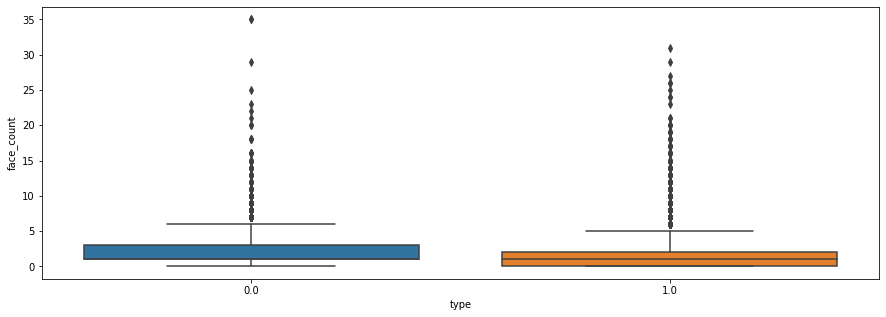

In [ ]:
  _, ax = plt.subplots(1,1, figsize=(15,5))
  sns.set_style("whitegrid")
  sns_plot = sns.boxplot(x = 'type', y = 'face_count', data = df)
  # sns_plot.figure.savefig("{}.png".format(i))

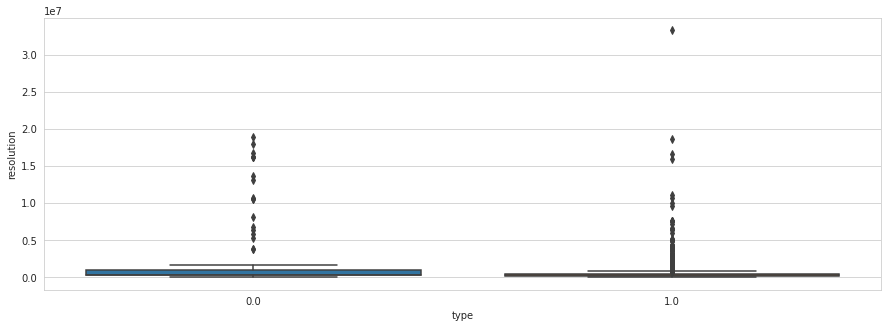

In [ ]:
  df['resolution'] = df['height'] * df['width']
  _, ax = plt.subplots(1,1, figsize=(15,5))
  sns.set_style("whitegrid")
  sns_plot = sns.boxplot(x = 'type', y = 'resolution', data = df)

In [ ]:
df['resolution'].describe()

count    7.272000e+03
mean     5.313871e+05
std      9.506765e+05
min      2.728000e+03
25%      2.216500e+05
50%      3.737510e+05
75%      6.752100e+05
max      3.324929e+07
Name: resolution, dtype: float64